# <center>Setup LandBOSSE</center>

In [45]:
import os
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import pandas as pd

from landbosse.excelio import XlsxSerialManagerRunner
from landbosse.excelio import XlsxParallelManagerRunner
from landbosse.excelio import XlsxGenerator
from landbosse.excelio import XlsxValidator
from landbosse.excelio import CsvGenerator

# When not running Binder and you want to provide your own input data, set_path to False:
set_path = True

# When running Binder set to True
running_binder = False

# LandBOSSE, small utility functions
from landbosse.excelio import XlsxFileOperations
if running_binder == True:
    binder_dir = os.path.join(os.getcwd(), 'jovyan')
    input_output_path = os.path.dirname(binder_dir)
else: 
    if set_path:
        input_output_path = '~/Desktop/'
    else:
        input_output_path = os.path.dirname(os.path.join(os.getcwd(), 'input'))

os.environ["LANDBOSSE_INPUT_DIR"] = input_output_path

<br/><br/>
# <center>Run LandBOSSE</center>

In [46]:
if __name__ == '__main__':
    # Print start timestamp
    print(f'>>>>>>>> Begin run {datetime.now()} <<<<<<<<<<')

    # The file_ops object handles file names for input and output data.
    file_ops = XlsxFileOperations()

    run_parallel = False
    manager_runner = XlsxParallelManagerRunner(file_ops) if run_parallel else XlsxSerialManagerRunner(file_ops)

    # project_xlsx is the absolute path of the project_list.xlsx
    projects_xlsx = os.path.join(file_ops.landbosse_input_dir(), 'project_list.xlsx')

    validation_enabled = False
    
    # final_result aggregates all the results from all the projects.
    final_result = manager_runner.run_from_project_list_xlsx(projects_xlsx, validation_enabled)

    print('Simulation Successful!')
#     print('Results: ')
#     print('')

>>>>>>>> Begin run 2022-06-10 13:36:46.667420 <<<<<<<<<<

>>> project_id: ge15_dist_165
>>> Project data: ~/Desktop/project_data/ge15_public.xlsx

Simulation Successful!


<br/><br/>
# <center>Collect BOS CapEx Results</center>

In [47]:
    # print(final_result)
    total_collection_cost = final_result['jp_collectioncost_total']
    total_development_cost = final_result['jp_developmentcost_total']
    total_erection_cost = final_result['jp_erectioncost_total']
    total_foundation_cost = final_result['jp_foundationcost_total']
    total_gridconnection_cost = final_result['jp_gridconnectioncost_total']
    total_management_cost = final_result['total_management_cost']
    total_sitepreparation_cost = final_result['jp_sitepreperationcost_total']
    total_substation_cost = final_result['jp_substationcost_total']

    total_bos_cost = \
        total_collection_cost + \
        total_development_cost + \
        total_erection_cost + \
        total_foundation_cost + \
        total_gridconnection_cost + \
        total_management_cost + \
        total_sitepreparation_cost + \
        total_substation_cost
    
    plant_capacity_kW = final_result['plant_capacity_MW'] * 1000
        
    total_bos_cost_kW = total_bos_cost / plant_capacity_kW
    
    print('Plant Size MW: ', final_result['plant_capacity_MW'])
    
    print('Collection Cost ($/kW): ', round(total_collection_cost / plant_capacity_kW))
    print('Development Cost ($/kW): ', round(total_development_cost / plant_capacity_kW))
    print('Erection Cost ($/kW): ', round(total_erection_cost / plant_capacity_kW))
    print('Foundation Cost ($/kW): ', round(total_foundation_cost / plant_capacity_kW))
    print('Grid Connection Cost ($/kW): ', round(total_gridconnection_cost / plant_capacity_kW))
    print('Management Cost ($/kW): ', round(total_management_cost / plant_capacity_kW))
    print('Site Preparation Cost ($/kW): ', round(total_sitepreparation_cost / plant_capacity_kW))
    print('Substation Cost ($/kW): ', round(total_substation_cost / plant_capacity_kW))
    print('')
    print('Total BOS CapEx ($/kW): ', round(total_bos_cost_kW))
    print('Financial Costs ($/kW): ', financial_costs_kW)    
    print('Turbine CapEx ($/kW): ', turbine_capex_kW)
    print('Total Project CapEx ($/kW): ', round(total_bos_cost_kW + financial_costs_kW + turbine_capex_kW))
    

Plant Size MW:  750.0
Collection Cost ($/kW):  48
Development Cost ($/kW):  0
Erection Cost ($/kW):  51
Foundation Cost ($/kW):  63
Grid Connection Cost ($/kW):  0
Management Cost ($/kW):  2
Site Preparation Cost ($/kW):  22
Substation Cost ($/kW):  14

Total BOS CapEx ($/kW):  199
Financial Costs ($/kW):  122
Turbine CapEx ($/kW):  1021
Total Project CapEx ($/kW):  1342


<br/><br/>
# <center>Collect Financial CapEx Results</center>

In [48]:
    ## Financial CapEx breakdown: 
    financial_costs_kW = 122 
    construction_financing_cost = 34
    contingency_fund = 88

<br/><br/>
# <center>Collect Turbine CapEx Results</center>

In [49]:
    ## Turbine CapEx breakdown: 
    turbine_capex_kW = 1021
    
    # Rotor cost and breakdown:
    rotor_cost = 311
    pitch_assembly = 201
    hub_assembly = 47
    
    # Nacelle cost and breakdown: 
    nacelle_module = 508
    nacelle_structural_assembly = 102
    drivetrain_assembly = 203
    nacelle_electrical_assembly = 164
    yaw_assembly = 38
    
    # Tower cost
    tower_module = 203
    

<br/><br/>
# <center>Figure 1. Donut Plot - CapEx for the land-based reference wind power plant project</center>

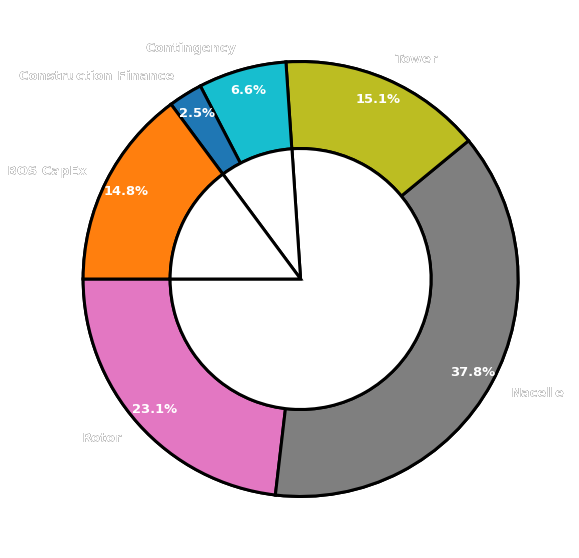

In [71]:
    # Plot
    start_angle = -180
    plt.figure(figsize=(10,10))
    names = ['Rotor', 'Nacelle', 'Tower', 'Contingency', 'Construction Finance', 'BOS CapEx']
    size = [rotor_cost, nacelle_module, tower_module, contingency_fund, construction_financing_cost, total_bos_cost_kW]

    plt.pie(size, labels = names, 
           startangle=start_angle,
#            autopct = '%1.1f%%', pctdistance = 0.9,
#             color = 'none',
            radius= 1.0, labeldistance=1.1,
            textprops ={'fontweight': 'bold', 'fontsize':13, 'color': "black"},
            wedgeprops = {'linewidth' : 3, 'edgecolor' : "black" }) 

    no_color = 'w'
    plt.pie(size, labels = names, 
            startangle=start_angle,
            autopct = '%1.1f%%', pctdistance = 0.9,
            color = [no_color]
            radius= 1.0, 
            labeldistance=1.1,
            textprops ={'fontweight': 'bold', 'fontsize':13, 'color': "white"},
            wedgeprops = {'linewidth' : 3, 'edgecolor' : "black" }) 
    
    # Internal Pies
    sub_names = ['Turbine CapEx', 'Financial CapEx', 'BOS CapEx']
    a = 'white'
    sub_size = [turbine_capex_kW, financial_costs_kW, total_bos_cost_kW]
    
    
    plt.pie(sub_size,startangle=start_angle, pctdistance =1.25, 
#             autopct = '%1.1f%%',
            radius= 0.60, colors=[a, a, a],
            textprops ={'fontweight': 'bold' ,'fontsize':13, 'color': "white"}, 
            wedgeprops = {'linewidth' : 3, 'edgecolor' : "black" } )
    
    
    plt.pie(sub_size,
            startangle=start_angle, 
#             labeldistance =0.65, labels = sub_names,
            radius= 0.60, colors=[a, a, a],
            textprops ={'fontweight': 'bold' ,'fontsize':10, 'color': "black"}, 
            wedgeprops = {'linewidth' : 3, 'edgecolor' : "black" } )
 
    # show it
    plt.show()